In [1]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena=img.open('lena.bmp')
lena_arr = np.asarray(lena)

In [2]:
def expan(arr):
    m=len(arr)
    n=len(arr[0])
    res=res=[[0]*(n+2) for i in range(m+2)]
    for i in range(1,m+1):
        res[i][0]=arr[i-1][0]
        res[i][n+1]=arr[i-1][n-1]
    for j in range(1,n+1):
        res[0][j]=arr[0][j-1]
        res[m+1][j]=arr[m-1][j-1]
    res[0][0]=arr[0][0]
    res[0][n+1]=arr[0][n-1]
    res[m+1][0]=arr[m-1][0]
    res[m+1][n+1]=arr[m-1][n-1]
    for i in range(1,m+1):
        for j in range(1,n+1):
            res[i][j]=arr[i-1][j-1]
    return res

In [5]:
mask=[[0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0],
[0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
[0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
[-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
[-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
[-2, -9, -23, -1, 103, 178, 103, -1, -23, -9, -2],
[-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
[-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
[0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
[0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
[0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0]]

In [41]:
def my_conv(lena,mask,theshold):
    m=len(lena)-len(mask)+1
    n=len(lena[0])-len(mask[0])+1
    mk=len(mask)
    nk=len(mask[0])
    res=[[0]*n for _ in range(m)]
    for i in range(m):
        for j in range(n):
            tmp=0
            for k in range(mk):
                for l in range(nk):
                    tmp+=mask[k][l]*lena[i+k][j+l]
            if tmp>=theshold:
                res[i][j]=1
            elif tmp<=-theshold:
                res[i][j]=-1
                
    return res
    

In [46]:
def Laplace1(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    mask=[[0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]]
    lena=expan(lena)
    res1=my_conv(lena,mask,theshold)
    res1=expan(res1)
    res2=[[1]*m for _ in range(n)]
    for i in range(m):
        for j in range(n):
            if res1[i+1][j+1]==1:
                tmp=False
                for k in range(3):
                    for l in range(3):
                        if res1[i+k][j+l]==-1:
                            tmp=True
                            break
                    if tmp:
                        break
                if tmp:
                    res2[i][j]=0
    return np.array(res2)*255

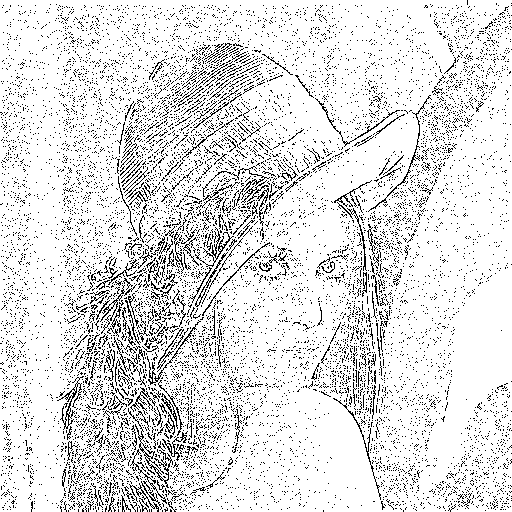

In [64]:
a=Laplace1(np.array(lena_arr,dtype='int'),15)
img.fromarray(np.array(a,dtype='uint8'))

In [50]:
def Laplace2(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    mask=[[1, 1, 1],
        [1, -8, 1],
        [1, 1, 1]]
    lena=expan(lena)
    res1=my_conv(lena,mask,theshold)
    res1=expan(res1)
    res2=[[1]*m for _ in range(n)]
    for i in range(m):
        for j in range(n):
            if res1[i+1][j+1]==1:
                tmp=False
                for k in range(3):
                    for l in range(3):
                        if res1[i+k][j+l]==-1:
                            tmp=True
                            break
                    if tmp:
                        break
                if tmp:
                    res2[i][j]=0
    return np.array(res2)*255

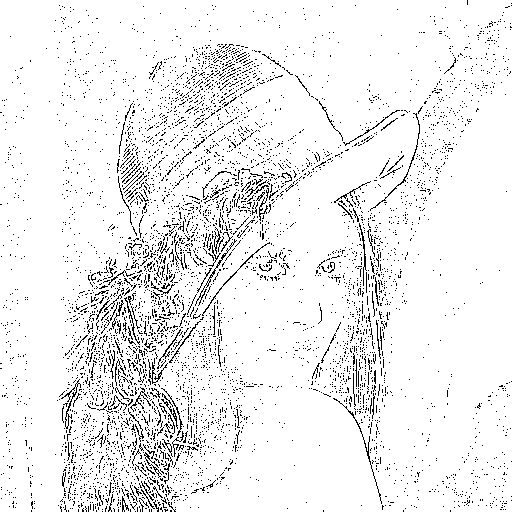

In [55]:
b=Laplace2(np.array(lena_arr,dtype='int'),45)
img.fromarray(np.array(b,dtype='uint8'))

In [56]:
def Minimum_Variance_Laplacian(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    mask=[[2, -1, 2],
        [-1, -4, -1],
        [2, -1, 2]]
    lena=expan(lena)
    res1=my_conv(lena,mask,theshold)
    res1=expan(res1)
    res2=[[1]*m for _ in range(n)]
    for i in range(m):
        for j in range(n):
            if res1[i+1][j+1]==1:
                tmp=False
                for k in range(3):
                    for l in range(3):
                        if res1[i+k][j+l]==-1:
                            tmp=True
                            break
                    if tmp:
                        break
                if tmp:
                    res2[i][j]=0
    return np.array(res2)*255

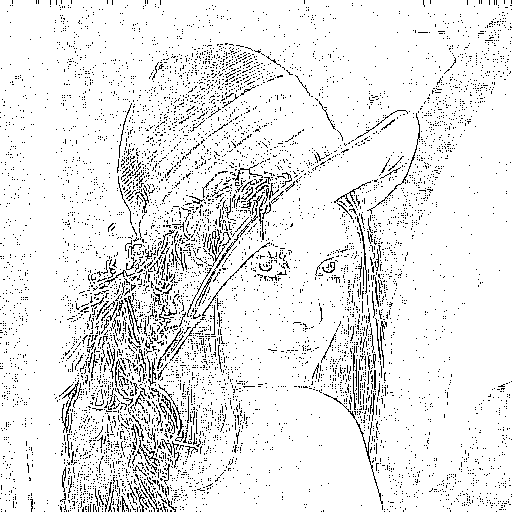

In [63]:
c=Minimum_Variance_Laplacian(np.array(lena_arr,dtype='int'),30)
img.fromarray(np.array(c,dtype='uint8'))

In [69]:
def Laplace_of_Gaussian(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    mask=[[0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0],
[0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
[0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
[-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
[-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
[-2, -9, -23, -1, 103, 178, 103, -1, -23, -9, -2],
[-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
[-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
[0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
[0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
[0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0]]
    for i in range(5):
        lena=expan(lena)
    res1=my_conv(lena,mask,theshold)
    res1=expan(res1)
    res2=[[1]*m for _ in range(n)]
    for i in range(m):
        for j in range(n):
            if res1[i+1][j+1]==1:
                tmp=False
                for k in range(3):
                    for l in range(3):
                        if res1[i+k][j+l]==-1:
                            tmp=True
                            break
                    if tmp:
                        break
                if tmp:
                    res2[i][j]=0
    return np.array(res2)*255

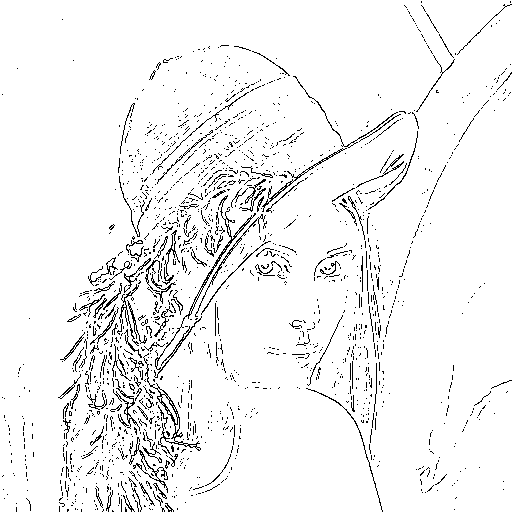

In [70]:
d=Laplace_of_Gaussian(np.array(lena_arr,dtype='int'),3000)
img.fromarray(np.array(d,dtype='uint8'))

In [67]:
def Difference_of_Gaussian(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    mask=[[-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
        [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
        [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
        [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
        [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
        [-8, -13, -17, 15, 160, 283, 160, 15, -17, -13, -8],
        [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
        [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
        [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
        [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
        [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1]]
    for i in range(5):
        lena=expan(lena)
    res1=my_conv(lena,mask,theshold)
    res1=expan(res1)
    res2=[[1]*m for _ in range(n)]
    for i in range(m):
        for j in range(n):
            if res1[i+1][j+1]==1:
                tmp=False
                for k in range(3):
                    for l in range(3):
                        if res1[i+k][j+l]==-1:
                            tmp=True
                            break
                    if tmp:
                        break
                if tmp:
                    res2[i][j]=0
    return np.array(res2)*255

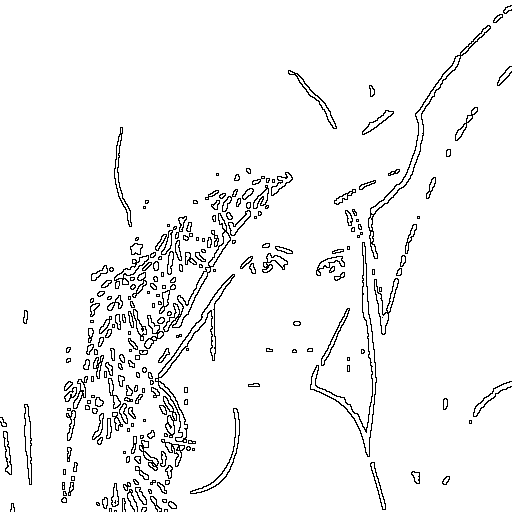

In [71]:
e=Difference_of_Gaussian(np.array(lena_arr,dtype='int'),1)
img.fromarray(np.array(e,dtype='uint8'))